In [1]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

"""
0. median imputation
1. normalise
2. feature selection using rfe to 250 ( -> IMPROVE!!!)
3. grad, knn regressors -> bagging -> average (1, 0.5)
4. => final prediction

"""

### 0. import -> impute
X_in = np.genfromtxt ('X_train.csv', delimiter=",")[1:,1:]
y_in = np.genfromtxt ('y_train.csv', delimiter=",")[1:,1:]
X_out = np.genfromtxt ('X_test.csv', delimiter=",")[1:,1:] #also contains NAs
print(X_in.shape)
print(X_out.shape)
labels_out = np.genfromtxt ('X_test.csv', delimiter=",")[1:,0]
X_tot = np.concatenate((X_in, X_out), axis=0)
print(X_tot.shape)

#median_imputer = simple_fill.SimpleFill(fill_method="median")
#X_tot = median_imputer.fit_transform(X_tot)
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
X_tot = imp_median.fit_transform(X_tot)

### 1. normalise
scaler = StandardScaler()
X_tot = scaler.fit_transform(X_tot)
X_in = X_tot[:X_in.shape[0],:]
X_out = X_tot[X_in.shape[0]:,:]
print(X_in.shape)
print(X_out.shape)

### 2. feature selection
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=250, step=2, verbose=1)
rfe.fit_transform(X_in, y_in)
indx = rfe.get_support(indices=True)
X_in = X_in[:,indx]
X_out = X_out[:,indx]

### 3. use different regressors
grad_1 = GradientBoostingRegressor(n_estimators=500, max_depth=4, subsample=0.8, random_state=666, max_features="auto")
grad_2 = GradientBoostingRegressor(n_estimators=500, max_depth=4, subsample=0.8, random_state=667, max_features="auto")
grad_3 = GradientBoostingRegressor(n_estimators=500, max_depth=4, subsample=0.8, random_state=668, max_features="auto")
grad_4 = GradientBoostingRegressor(n_estimators=500, max_depth=4, subsample=0.8, random_state=669, max_features="auto")
grad_5 = GradientBoostingRegressor(n_estimators=500, max_depth=4, subsample=0.8, random_state=670, max_features="auto")

knn = KNeighborsRegressor(n_neighbors=9, weights="distance", p=1)

regs = [grad_1, grad_2, grad_3, grad_4, grad_5, knn]
fits = np.zeros((X_in.shape[0], len(regs)))
preds = np.zeros((X_out.shape[0], len(regs)))
for i, reg in enumerate(regs):
    reg.fit(X_in, np.ravel(y_in))
    fits[:, i] = reg.predict(X_in)
    preds[:, i] = reg.predict(X_out)


mask = [.2, .2, .2, .2, .2, .5]
mask = mask / np.sum(mask)
print(mask)
train_pred = np.sum(fits*mask, axis=1)
test_pred = np.sum(preds*mask, axis=1)

print(r2_score(y_in, np.ravel(train_pred))) # training accuracy

test_pred = np.reshape(test_pred, (test_pred.shape[0],1))
labels_out = np.reshape(labels_out, (labels_out.shape[0],1))

out = np.concatenate((labels_out, test_pred), axis=1)
np.savetxt("out.csv", out, delimiter=",", header="id,y") # NEED TO MANUALLY REMOVE # FROM HEADER


(1212, 832)
(776, 832)
(1988, 832)
(1212, 832)
(776, 832)
Fitting estimator with 832 features.


/Users/Seb/anaconda3/envs/aml/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 830 features.
Fitting estimator with 828 features.
Fitting estimator with 826 features.
Fitting estimator with 824 features.
Fitting estimator with 822 features.
Fitting estimator with 820 features.
Fitting estimator with 818 features.
Fitting estimator with 816 features.
Fitting estimator with 814 features.
Fitting estimator with 812 features.
Fitting estimator with 810 features.
Fitting estimator with 808 features.
Fitting estimator with 806 features.
Fitting estimator with 804 features.
Fitting estimator with 802 features.
Fitting estimator with 800 features.
Fitting estimator with 798 features.
Fitting estimator with 796 features.
Fitting estimator with 794 features.
Fitting estimator with 792 features.
Fitting estimator with 790 features.
Fitting estimator with 788 features.
Fitting estimator with 786 features.
Fitting estimator with 784 features.
Fitting estimator with 782 features.
Fitting estimator with 780 features.
Fitting estimator with 778 features.
F

Fitting estimator with 380 features.
Fitting estimator with 378 features.
Fitting estimator with 376 features.
Fitting estimator with 374 features.
Fitting estimator with 372 features.
Fitting estimator with 370 features.
Fitting estimator with 368 features.
Fitting estimator with 366 features.
Fitting estimator with 364 features.
Fitting estimator with 362 features.
Fitting estimator with 360 features.
Fitting estimator with 358 features.
Fitting estimator with 356 features.
Fitting estimator with 354 features.
Fitting estimator with 352 features.
Fitting estimator with 350 features.
Fitting estimator with 348 features.
Fitting estimator with 346 features.
Fitting estimator with 344 features.
Fitting estimator with 342 features.
Fitting estimator with 340 features.
Fitting estimator with 338 features.
Fitting estimator with 336 features.
Fitting estimator with 334 features.
Fitting estimator with 332 features.
Fitting estimator with 330 features.
Fitting estimator with 328 features.
F

In [4]:
from matplotlib import pyplot as plt

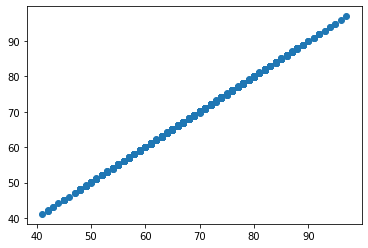

In [5]:
plt.scatter(y_in, train_pred)

(array([ 15.,  35.,  89.,  84., 102., 125., 109., 101.,  88.,  28.]),
 array([54.33308491, 57.17860374, 60.02412258, 62.86964141, 65.71516024,
        68.56067908, 71.40619791, 74.25171674, 77.09723557, 79.94275441,
        82.78827324]),
 <a list of 10 Patch objects>)

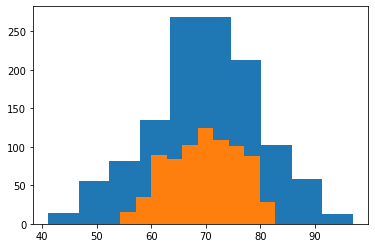

In [11]:
plt.hist(train_pred)
plt.hist(test_pred)
